In [4]:
import yfinance as yf
import pandas as pd


In [5]:
# Extract Tesla stock data
tesla_stock = yf.Ticker("TSLA")
tesla_stock_data = tesla_stock.history(period="max")
tesla_stock_data.reset_index(inplace=True)
tesla_stock_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [24]:
#Task 2: Extracting Tesla Revenue Data Using Webscraping"


In [25]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Fetch the webpage content
url = 'https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, 'html.parser')

# Step 2: Locate the table containing Tesla Quarterly Revenue
table = soup.find_all('table', {'class': 'historical_data_table table'})[1]

# Step 3: Extract the data
rows = table.find_all('tr')
data = []
for row in rows[1:]:
    cols = row.find_all('td')
    date = cols[0].text.strip()
    revenue = cols[1].text.strip().replace('$', '').replace(',', '')
    data.append({'Date': date, 'Revenue': revenue})

# Step 4: Create DataFrame
tesla_revenue = pd.DataFrame(data)

# Step 5: Display the last five rows
print(tesla_revenue.tail())



          Date Revenue
58  2010-06-30      28
59  2010-03-31      21
60  2009-12-31        
61  2009-09-30      46
62  2009-06-30      27


In [ ]:
#Question 3: Use yfinance to Extract Stock Data

In [26]:
import yfinance as yf
import pandas as pd

# Step 1: Extract GameStop stock data
gme_stock = yf.Ticker("GME")
gme_data = gme_stock.history(period="max")

# Step 2: Reset the index
gme_data.reset_index(inplace=True)

# Step 3: Display the first five rows
print(gme_data.head())


                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683251  1.687459  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662209  1.603296  1.662209   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [ ]:
#Question 4: Use Webscraping to Extract GME Revenue Data

In [27]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Fetch the webpage content
url = 'https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue'
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, 'html.parser')

# Step 2: Locate the table containing GameStop Quarterly Revenue
table = soup.find_all('table', {'class': 'historical_data_table table'})[1]

# Step 3: Extract the data
rows = table.find_all('tr')
data = []
for row in rows[1:]:
    cols = row.find_all('td')
    date = cols[0].text.strip()
    revenue = cols[1].text.strip().replace('$', '').replace(',', '')
    data.append({'Date': date, 'Revenue': revenue})

# Step 4: Create DataFrame
gme_revenue = pd.DataFrame(data)

# Step 5: Display the last five rows
print(gme_revenue.tail())


          Date Revenue
59  2010-01-31    3524
60  2009-10-31    1835
61  2009-07-31    1739
62  2009-04-30    1981
63  2009-01-31    3492


In [30]:
#Question 5: Plot Tesla Stock Graph

In [32]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Fetch Tesla's revenue data from Macrotrends
url = 'https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, 'html.parser')

# Parse the revenue table
table = soup.find_all('table', {'class': 'historical_data_table table'})[1]
rows = table.find_all('tr')

# Extract data into a DataFrame
data = []
for row in rows[1:]:
    cols = row.find_all('td')
    date = cols[0].text.strip()
    revenue = cols[1].text.strip().replace('$', '').replace(',', '')
    data.append({'Date': date, 'Revenue': revenue})

# Create a DataFrame and display the data
tesla_revenue = pd.DataFrame(data)
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])
tesla_revenue['Revenue'] = pd.to_numeric(tesla_revenue['Revenue'], errors='coerce')
print(tesla_revenue.tail())


         Date  Revenue
58 2010-06-30     28.0
59 2010-03-31     21.0
60 2009-12-31      NaN
61 2009-09-30     46.0
62 2009-06-30     27.0


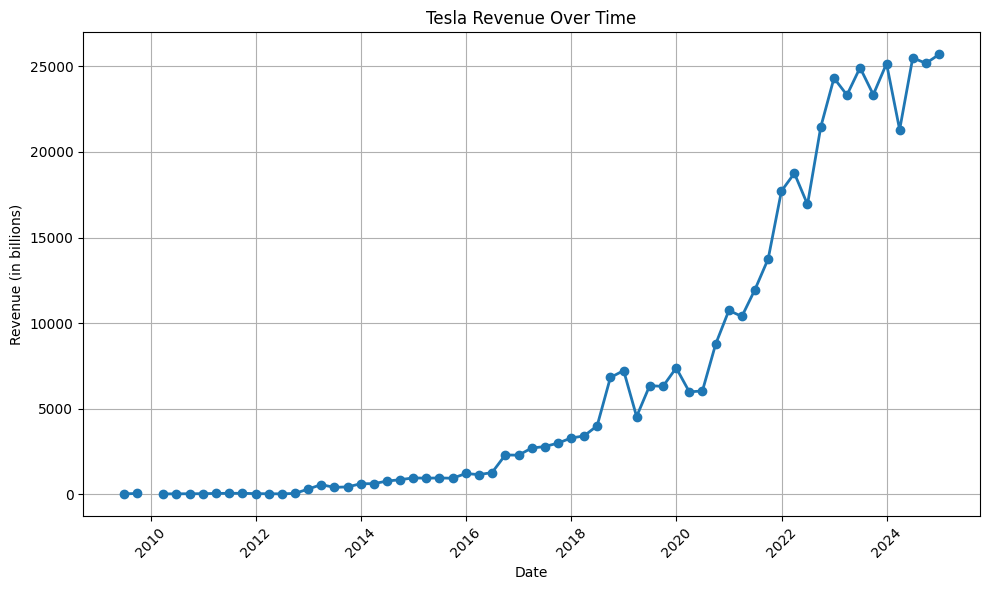

In [33]:
import matplotlib.pyplot as plt

# Plot the Tesla Revenue data
plt.figure(figsize=(10, 6))

# Create the line plot for Tesla's revenue
plt.plot(tesla_revenue['Date'], tesla_revenue['Revenue'], marker='o', linestyle='-', linewidth=2)

# Add titles and labels
plt.title("Tesla Revenue Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue (in billions)")
plt.xticks(rotation=45)
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
#Question 6 Plot gamestop stock graph

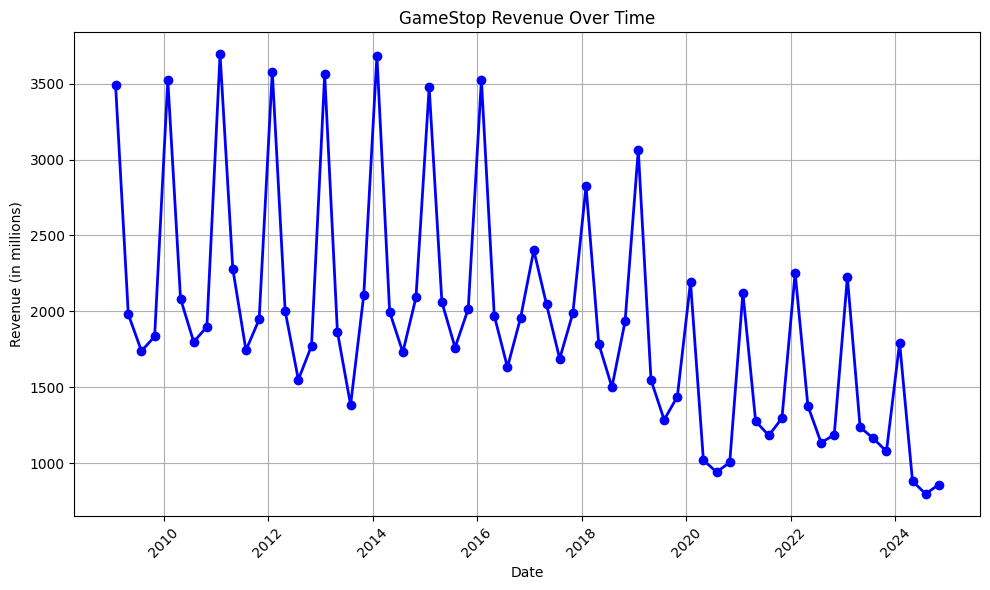

In [35]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Fetch GameStop's revenue data from Macrotrends
url = 'https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue'
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, 'html.parser')

# Step 2: Parse the revenue table
table = soup.find_all('table', {'class': 'historical_data_table table'})[1]
rows = table.find_all('tr')

# Step 3: Extract data into a DataFrame
data = []
for row in rows[1:]:
    cols = row.find_all('td')
    date = cols[0].text.strip()
    revenue = cols[1].text.strip().replace('$', '').replace(',', '')
    data.append({'Date': date, 'Revenue': revenue})

# Step 4: Create and clean the DataFrame
gme_revenue = pd.DataFrame(data)
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])
gme_revenue['Revenue'] = pd.to_numeric(gme_revenue['Revenue'], errors='coerce')

# Step 5: Plot the GameStop Revenue data using Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(gme_revenue['Date'], gme_revenue['Revenue'], marker='o', linestyle='-', linewidth=2, color='blue')

# Add titles and labels
plt.title("GameStop Revenue Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue (in millions)")
plt.xticks(rotation=45)
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()
